In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
from sklearn.model_selection import train_test_split

### Steps of how you approached this project
- Ran a ton of pairplots against win % (as the KPI) to see what correlates w/ it
- After determining no's, maybe's, and yes' created a new dataframe called df. Going to be using that for analysis from this point forward.
- May need to test against another KPI as well

In [2]:
cfb = pd.read_csv('C:/Users/Jing/Desktop/Galvanize_Capstones/JingWu-Final_Capstone/CFB.csv')

In [3]:
cfb.rename({'Opp Rush Yards Alloweed': 'Opp Rush Yards Allowed'},inplace=True)

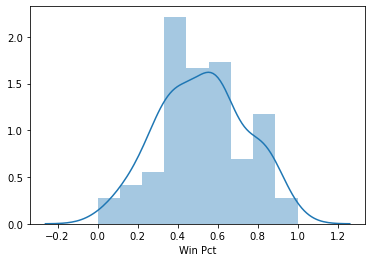

In [4]:
sns.distplot(cfb['Win Pct'])

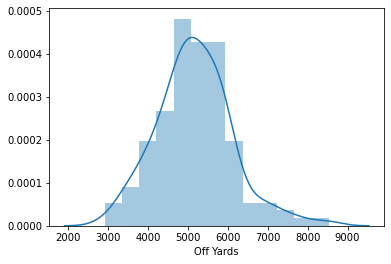

In [5]:
sns.distplot(cfb['Off Yards'])

In [7]:
pd.set_option('display.max_columns', 999)

In [8]:
cfb.head(1)

,Team,Conference,Win,Loss,Games,Win Pct,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,Yards Allowed,Yards/Play Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,First Down Def Rank,Opp First Down Runs,Opp First Down Passes,Opp First Down Penalties,Opp First Downs,4th Down Rank,4th Attempts,4th Conversions,4th Percent,4rd Down Def Rank,Opp 4th Conversion,Opp 4th Attempt,Opponent 4th Percent,Kickoff Return Def Rank,Opp Kickoff Returns,Kickoff Touchbacks,Opponent Kickoff Return Yards,Opp Kickoff Return Touchdowns Allowed,Avg Yards per Kickoff Return Allowed,Kickoff Return Rank,Kickoffs Returned,Kickoff Return Yards,Kickoff Return Touchdowns,Avg Yard per Kickoff Return,Passing Off Rank,Pass Attempts,Pass Completions,Interceptions Thrown.x,Pass Yards,Pass Yards/Attempt,Yards/Completion,Pass Touchdowns,Pass Yards Per Game,Pass Def Rank,Opp Completions Allowed,Opp Pass Attempts,Opp Pass Yds Allowed,Opp Pass TDs Allowed,Yards/Attempt Allowed,Yards/Completion Allowed,Pass Yards Per Game Allowed,Penalty Rank,Penalties,Penalty Yards,Penalty Yards Per Game,Punt Return Rank,Punt Returns,Net Punt Return Yards,Punt Return Touchdowns,Avg Yards Per Punt Return,Punt Return Def Rank,Opp Punt Returns,Opp Net Punt Return Yards,Opp Punt Return Touchdowns Allowed,Avg Yards Allowed per Punt Return,Redzone Def Rank,Opp Redzone Attempts,Opp Redzone Rush TD Allowed,Opp Redzone Pass Touchdowns Allowed,Opp Redzone Field Goals Made,Opp Redzone Scores,Redzone Points Allowed,Redzone Off Rank,Redzone Attempts,Redzone Rush TD,Redzone Pass TD,Redzone Field Goals Made,Redzone Scores,Redzone Points,Rushing Def Rank,Opp Rush Attempts,Opp Rush Yards Alloweed,Yds/Rush Allowed,Opp Rush Touchdowns Allowed,Rush Yards Per Game Allowed,Rushing Off Rank,Rush Attempts,Rush Yds,Yards/Rush,Rushing TD,Rushing Yards per Game,Sack Rank,Sacks,Sack Yards,Average Sacks per Game,Scoring Def Rank,Touchdowns Allowed,Opponent Extra Points,2 Point Conversions Allowed,Opp Deflected Extra Points,Opp Feild Goals Made,Opp Safety,Points Allowed,Avg Points per Game Allowed,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Defensive Points,Feild Goals,Safety,Total Points,Points Per Game,Tackle for Loss Rank,Solo Tackle For Loss,Assist Tackle For Loss,Tackle for Loss Yards,Total Tackle For Loss,Tackle For Loss Per Game,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,Time of Possession Rank,Time of Possession,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game
0,Air Force,Mountain West,11,2,13,0.846154,51,881,5483,6.22,55,421.8,17,752,4155,5.53,32,34,319.6,45,227,52,7,286,9,77,131,8,216,5,16,21,0.762,44,13,28,0.464,82,36,26,772,0,21.44,129,7,93,0,13.29,125,126,68,6,1602,12.71,23.56,14,123.2,51,238,377,2848,21,7.55,11.97,219.1,2,42,368,28.31,129,5,6,0,1.2,27,7,38,0,5.43,9,43,10,13,8,31,0.721,33,54,39,0,9,48,0.889,7,375,1307,3.49,11,100.5,2,755,3881,5.14,41,298.5,72,26,168,2.0,20,34,27,0,0,9,0,258,19.8,21,58,52,1,1,13,0,443,34.1,125,37,34,247,54,4.2,2,157,84,0.535,2,448:07,34:28,78,9,7,16,12,6,18,-2,-0.15


In [9]:
cfb.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 129
Data columns (total 149 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   Team                                   object 
 1   Conference                             object 
 2   Win                                    int64  
 3   Loss                                   int64  
 4   Games                                  int64  
 5   Win Pct                                float64
 6   Off Rank                               int64  
 7   Off Plays                              int64  
 8   Off Yards                              int64  
 9   Off Yards/Play                         float64
 10  Off TDs                                int64  
 11  Off Yards per Game                     float64
 12  Def Rank                               int64  
 13  Def Plays                              int64  
 14  Yards Allowed                          int64  
 15  Yards

In [58]:
# pd.set_option('max_height', 1000)
pd.set_option('max_rows', 500)
pd.set_option('max_columns', 500)
# pd.set_option('width', 1000)
cor = cfb.corr()

In [70]:
cfb.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 129
Data columns (total 149 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   Team                                   object 
 1   Conference                             object 
 2   Win                                    int64  
 3   Loss                                   int64  
 4   Games                                  int64  
 5   Win Pct                                float64
 6   Off Rank                               int64  
 7   Off Plays                              int64  
 8   Off Yards                              int64  
 9   Off Yards/Play                         float64
 10  Off TDs                                int64  
 11  Off Yards per Game                     float64
 12  Def Rank                               int64  
 13  Def Plays                              int64  
 14  Yards Allowed                          int64  
 15  Yards

In [242]:
df = cfb.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,15,16,17,18,19,20,23,39,53,55,59,62,80,81,84,87,88,91,92,93,95,96,97,98,101,103,105,106,107,108,109,110,111,116,117,118,
                119,120,125,126,128,130,131,133,135,136,140,142,143,147,148]].copy()

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 129
Data columns (total 64 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Team                          130 non-null    object 
 1   Conference                    130 non-null    object 
 2   Win                           130 non-null    int64  
 3   Loss                          130 non-null    int64  
 4   Games                         130 non-null    int64  
 5   Win Pct                       130 non-null    float64
 6   Off Rank                      130 non-null    int64  
 7   Off Plays                     130 non-null    int64  
 8   Off Yards                     130 non-null    int64  
 9   Off Yards/Play                130 non-null    float64
 10  Off TDs                       130 non-null    int64  
 11  Off Yards per Game            130 non-null    float64
 12  Def Rank                      130 non-null    int64  
 13  Yards

In [243]:
df1 = df.iloc[:,[5,7,10,11,14,16,18,20,21,22,23,24,25,26,27,28,29,31,33,35,36,37,38,40,42,44,45,47,49,50,52,54,55,57,60,61,63]].copy()

In [244]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 129
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Win Pct                       130 non-null    float64
 1   Off Plays                     130 non-null    int64  
 2   Off TDs                       130 non-null    int64  
 3   Off Yards per Game            130 non-null    float64
 4   Off TDs Allowed               130 non-null    int64  
 5   Yards Per Game Allowed        130 non-null    float64
 6   First Down Runs               130 non-null    int64  
 7   Kickoff Touchbacks            130 non-null    int64  
 8   Pass Yards/Attempt            130 non-null    float64
 9   Pass Touchdowns               130 non-null    int64  
 10  Opp Pass Attempts             130 non-null    int64  
 11  Yards/Attempt Allowed         130 non-null    float64
 12  Opp Redzone Attempts          130 non-null    int64  
 13  Opp R

In [246]:
df1.rename(columns={"Opp Rush Yards Alloweed": "Opp Rush Yards Allowed", "3rd Conversions": "Third Conversions"},inplace=True)

In [247]:
df1.columns = [item.replace(' ','_') for item in df1.columns]
df1.columns = [item.replace('/','_') for item in df1.columns]

In [248]:
df1.columns[33]

'Third_Conversions'

In [249]:
df1.head(1)

,Win_Pct,Off_Plays,Off_TDs,Off_Yards_per_Game,Off_TDs_Allowed,Yards_Per_Game_Allowed,First_Down_Runs,Kickoff_Touchbacks,Pass_Yards_Attempt,Pass_Touchdowns,Opp_Pass_Attempts,Yards_Attempt_Allowed,Opp_Redzone_Attempts,Opp_Redzone_Rush_TD_Allowed,Opp_Redzone_Scores,Redzone_Attempts,Redzone_Rush_TD,Redzone_Points,Opp_Rush_Yards_Allowed,Opp_Rush_Touchdowns_Allowed,Rush_Yards_Per_Game_Allowed,Rush_Yds,Rushing_TD,Sacks,Average_Sacks_per_Game,Touchdowns_Allowed,Opponent_Extra_Points,Avg_Points_per_Game_Allowed,Touchdowns,PAT,Points_Per_Game,Tackle_for_Loss_Yards,Total_Tackle_For_Loss,Third_Conversions,Opponents_Intercepted,Turnovers_Gain,Avg_Turnover_Margin_per_Game
0,0.846154,881,55,421.8,32,319.6,227,26,12.71,14,377,7.55,43,10,31,54,39,0.889,1307,11,100.5,3881,41,26,2.0,34,27,19.8,58,52,34.1,247,54,84,7,16,-0.15


### Running Linear Regressions. Supposed to have around 60 linear tests

In [251]:
def statsmodels_train_test_split(df, stratify=None, **kwargs):

    if stratify is None:
        y, X = df.iloc[:,0], df.drop(columns=df.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, df.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)

In [254]:
formula = 'Win_Pct ~ Off_Plays + Off_TDs + Off_Yards_per_Game + Off_TDs_Allowed + Yards_Per_Game_Allowed + First_Down_Runs + Kickoff_Touchbacks + Pass_Yards_Attempt + Pass_Touchdowns + Opp_Pass_Attempts + Yards_Attempt_Allowed + Opp_Redzone_Attempts + Opp_Redzone_Rush_TD_Allowed + Opp_Redzone_Scores + Redzone_Attempts + Redzone_Rush_TD + Redzone_Points + Opp_Rush_Yards_Allowed + Opp_Rush_Touchdowns_Allowed + Rush_Yards_Per_Game_Allowed + Rush_Yds + Rushing_TD + Sacks + Average_Sacks_per_Game + Touchdowns_Allowed + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Touchdowns + PAT + Points_Per_Game + Tackle_for_Loss_Yards + Total_Tackle_For_Loss + Third_Conversions + Opponents_Intercepted + Turnovers_Gain + Avg_Turnover_Margin_per_Game'

In [255]:
train, test = statsmodels_train_test_split(df1)

In [256]:
model = smf.ols(formula = formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     24.83
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           5.67e-25
Time:                        15:17:35   Log-Likelihood:                 148.22
No. Observations:                  97   AIC:                            -224.4
Df Residuals:                      61   BIC:                            -131.7
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.6445      0.458     -1.407      0.164      -1.560       0.271
Off_Plays                        0.0004      0.000      1.253      0.215      -0.000       0.001
Off_TDs                         -0.0035      0.004     -0.838      0.405      -0.012       0.005
Off_Yards_per_Game              -0.0006      0.001     -1.162      0.250      -0.002       0.000
Off_TDs_Allowed                 -0.0099      0.008     -1.276      0.207      -0.026       0.006
Yards_Per_Game_Allowed          -0.0026      0.002     -1.324      0.190      -0.006       0.001
First_Down_Runs                  0.0008      0.001      0.684      0.496      -0.002       0.003
Kickoff_Touchbacks              -0.0007      0.001     -1.134      0.261      -0.002       0.001
Pass_Yards_Attempt               0.0265      0.015      1.721      0.090      -0.004       0.057
Pass_Touchdowns                 -0.0011      0.003     -0.421      0.675      -0.007       0.004
Opp_Pass_Attempts                0.0017      0.001      1.612      0.112      -0.000       0.004
Yards_Attempt_Allowed            0.0842      0.060      1.411      0.163      -0.035       0.204
Opp_Redzone_Attempts            -0.0012      0.003     -0.343      0.733      -0.008       0.006
Opp_Redzone_Rush_TD_Allowed      0.0026      0.006      0.450      0.654      -0.009       0.014
Opp_Redzone_Scores               0.0020      0.004      0.459      0.648      -0.007       0.011
Redzone_Attempts                -0.0013      0.002     -0.597      0.553      -0.006       0.003
Redzone_Rush_TD                 -0.0009      0.005     -0.179      0.859      -0.011       0.009
Redzone_Points                   0.0212      0.170      0.124      0.901      -0.320       0.362
Opp_Rush_Yards_Allowed           0.0002      0.000      0.779      0.439      -0.000       0.001
Opp_Rush_Touchdowns_Allowed     -0.0030      0.005     -0.583      0.562      -0.013       0.007
Rush_Yards_Per_Game_Allowed      0.0007      0.004      0.187      0.853      -0.007       0.008
Rush_Yds                     -1.795e-05   5.83e-05     -0.308      0.759      -0.000    9.87e-05
Rushing_TD                      -0.0024      0.004     -0.667      0.507      -0.009       0.005
Sacks                           -0.0068      0.014     -0.469      0.641      -0.036       0.022
Average_Sacks_per_Game           0.0926      0.185      0.500      0.619      -0.278       0.463
Touchdowns_Allowed               0.0081      0.012      0.674      0.503      -0.016       0.032
Opponent_Extra_Points            0.0081      0.004      2.082      0.042       0.000       0.016
Avg_Points_per_Game_Allowed     -0.0240      0.017     -1.384      0.171      -0.059       0.011
Touchdowns                       0.0027      0.008      0.325      0.746    

In [257]:
formula1 = 'Win_Pct ~ Off_Plays + Off_TDs + Off_Yards_per_Game + Off_TDs_Allowed + Yards_Per_Game_Allowed + First_Down_Runs + Kickoff_Touchbacks + Pass_Yards_Attempt + Pass_Touchdowns + Opp_Pass_Attempts + Yards_Attempt_Allowed + Opp_Redzone_Attempts + Opp_Redzone_Rush_TD_Allowed + Opp_Redzone_Scores + Redzone_Attempts + Redzone_Rush_TD + Opp_Rush_Yards_Allowed + Opp_Rush_Touchdowns_Allowed + Rush_Yards_Per_Game_Allowed + Rush_Yds + Rushing_TD + Sacks + Average_Sacks_per_Game + Touchdowns_Allowed + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Touchdowns + Points_Per_Game + Tackle_for_Loss_Yards + Total_Tackle_For_Loss + Third_Conversions + Opponents_Intercepted + Turnovers_Gain + Avg_Turnover_Margin_per_Game'

In [258]:
train1, test1 = statsmodels_train_test_split(df1)

In [259]:
model1 = smf.ols(formula = formula1, data=train1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     28.35
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           6.39e-27
Time:                        15:21:37   Log-Likelihood:                 143.21
No. Observations:                  97   AIC:                            -218.4
Df Residuals:                      63   BIC:                            -130.9
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.9895      0.559     -1.771      0.081      -2.106       0.127
Off_Plays                        0.0006      0.000      1.527      0.132      -0.000       0.001
Off_TDs                         -0.0047      0.004     -1.222      0.226      -0.012       0.003
Off_Yards_per_Game              -0.0008      0.001     -1.357      0.180      -0.002       0.000
Off_TDs_Allowed                 -0.0085      0.007     -1.191      0.238      -0.023       0.006
Yards_Per_Game_Allowed          -0.0032      0.002     -1.406      0.165      -0.008       0.001
First_Down_Runs                 -0.0007      0.001     -0.534      0.595      -0.003       0.002
Kickoff_Touchbacks              -0.0002      0.001     -0.257      0.798      -0.001       0.001
Pass_Yards_Attempt               0.0368      0.012      2.954      0.004       0.012       0.062
Pass_Touchdowns                 -0.0016      0.002     -0.661      0.511      -0.006       0.003
Opp_Pass_Attempts                0.0024      0.001      1.863      0.067      -0.000       0.005
Yards_Attempt_Allowed            0.1029      0.073      1.409      0.164      -0.043       0.249
Opp_Redzone_Attempts             0.0012      0.004      0.336      0.738      -0.006       0.008
Opp_Redzone_Rush_TD_Allowed     -0.0004      0.006     -0.070      0.944      -0.012       0.011
Opp_Redzone_Scores               0.0007      0.004      0.175      0.862      -0.008       0.009
Redzone_Attempts                -0.0007      0.002     -0.370      0.713      -0.004       0.003
Redzone_Rush_TD                  0.0018      0.005      0.377      0.707      -0.008       0.011
Opp_Rush_Yards_Allowed          -0.0002      0.000     -0.703      0.485      -0.001       0.000
Opp_Rush_Touchdowns_Allowed      0.0010      0.005      0.206      0.838      -0.009       0.011
Rush_Yards_Per_Game_Allowed      0.0066      0.004      1.482      0.143      -0.002       0.016
Rush_Yds                      4.613e-05   6.47e-05      0.712      0.479   -8.33e-05       0.000
Rushing_TD                      -0.0031      0.003     -0.915      0.364      -0.010       0.004
Sacks                           -0.0192      0.015     -1.264      0.211      -0.049       0.011
Average_Sacks_per_Game           0.2756      0.194      1.422      0.160      -0.112       0.663
Touchdowns_Allowed               0.0107      0.011      0.975      0.333      -0.011       0.033
Opponent_Extra_Points            0.0079      0.004      2.018      0.048    7.69e-05       0.016
Avg_Points_per_Game_Allowed     -0.0383      0.015     -2.489      0.015      -0.069      -0.008
Touchdowns                       0.0061      0.007      0.900      0.372      -0.007       0.020
Points_Per_Game                  0.0132      0.009      1.426      0.159    

In [260]:
formula2 = 'Win_Pct ~ Off_Plays + Off_TDs + Off_Yards_per_Game + Off_TDs_Allowed + Yards_Per_Game_Allowed + First_Down_Runs + Kickoff_Touchbacks + Pass_Yards_Attempt + Pass_Touchdowns + Opp_Pass_Attempts + Yards_Attempt_Allowed + Opp_Redzone_Attempts + Opp_Redzone_Scores + Redzone_Attempts + Redzone_Rush_TD + Opp_Rush_Yards_Allowed + Opp_Rush_Touchdowns_Allowed + Rush_Yards_Per_Game_Allowed + Rush_Yds + Rushing_TD + Sacks + Average_Sacks_per_Game + Touchdowns_Allowed + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Touchdowns + Points_Per_Game + Tackle_for_Loss_Yards + Total_Tackle_For_Loss + Third_Conversions + Opponents_Intercepted + Turnovers_Gain + Avg_Turnover_Margin_per_Game'

In [261]:
train2, test2 = statsmodels_train_test_split(df1)

In [262]:
model2 = smf.ols(formula = formula2, data=train2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     32.71
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           6.94e-29
Time:                        15:25:27   Log-Likelihood:                 147.26
No. Observations:                  97   AIC:                            -228.5
Df Residuals:                      64   BIC:                            -143.6
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.9982      0.493     -2.026      0.047      -1.982      -0.014
Off_Plays                        0.0005      0.000      1.399      0.167      -0.000       0.001
Off_TDs                         -0.0063      0.004     -1.735      0.087      -0.014       0.001
Off_Yards_per_Game              -0.0012      0.001     -2.282      0.026      -0.002      -0.000
Off_TDs_Allowed                 -0.0119      0.007     -1.720      0.090      -0.026       0.002
Yards_Per_Game_Allowed          -0.0028      0.002     -1.393      0.169      -0.007       0.001
First_Down_Runs                 -0.0015      0.001     -1.312      0.194      -0.004       0.001
Kickoff_Touchbacks               0.0001      0.001      0.218      0.829      -0.001       0.001
Pass_Yards_Attempt               0.0352      0.013      2.736      0.008       0.009       0.061
Pass_Touchdowns                 -0.0023      0.002     -1.092      0.279      -0.007       0.002
Opp_Pass_Attempts                0.0023      0.001      2.063      0.043    7.12e-05       0.004
Yards_Attempt_Allowed            0.1058      0.064      1.645      0.105      -0.023       0.234
Opp_Redzone_Attempts             0.0031      0.003      0.984      0.329      -0.003       0.010
Opp_Redzone_Scores              -0.0016      0.004     -0.395      0.694      -0.010       0.006
Redzone_Attempts                 0.0015      0.002      0.773      0.443      -0.002       0.005
Redzone_Rush_TD                  0.0007      0.004      0.164      0.870      -0.008       0.009
Opp_Rush_Yards_Allowed          -0.0002      0.000     -1.014      0.314      -0.001       0.000
Opp_Rush_Touchdowns_Allowed      0.0009      0.003      0.337      0.737      -0.005       0.006
Rush_Yards_Per_Game_Allowed      0.0073      0.004      1.684      0.097      -0.001       0.016
Rush_Yds                      7.492e-05   5.62e-05      1.332      0.188   -3.74e-05       0.000
Rushing_TD                      -0.0040      0.003     -1.255      0.214      -0.010       0.002
Sacks                           -0.0154      0.014     -1.063      0.292      -0.044       0.014
Average_Sacks_per_Game           0.2431      0.185      1.312      0.194      -0.127       0.613
Touchdowns_Allowed               0.0205      0.011      1.949      0.056      -0.001       0.042
Opponent_Extra_Points            0.0058      0.004      1.589      0.117      -0.002       0.013
Avg_Points_per_Game_Allowed     -0.0477      0.016     -3.063      0.003      -0.079      -0.017
Touchdowns                       0.0070      0.006      1.083      0.283      -0.006       0.020
Points_Per_Game                  0.0177      0.008      2.259      0.027       0.002       0.033
Tackle_for_Loss_Yards            0.0002      0.000      0.602      0.549    

In [267]:
formula3 = 'Win_Pct ~ Off_Plays + Off_TDs + Off_Yards_per_Game + Off_TDs_Allowed + Yards_Per_Game_Allowed + First_Down_Runs + Pass_Yards_Attempt + Pass_Touchdowns + Opp_Pass_Attempts + Yards_Attempt_Allowed + Opp_Redzone_Attempts + Opp_Redzone_Scores + Redzone_Attempts + Opp_Rush_Yards_Allowed + Opp_Rush_Touchdowns_Allowed + Rush_Yards_Per_Game_Allowed + Rush_Yds + Rushing_TD + Sacks + Average_Sacks_per_Game + Touchdowns_Allowed + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Touchdowns + Points_Per_Game + Tackle_for_Loss_Yards + Total_Tackle_For_Loss + Third_Conversions + Opponents_Intercepted + Turnovers_Gain + Avg_Turnover_Margin_per_Game'

In [268]:
train3, test3 = statsmodels_train_test_split(df1)

In [269]:
model3 = smf.ols(formula = formula3, data=train3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     38.06
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           3.47e-31
Time:                        15:31:29   Log-Likelihood:                 156.61
No. Observations:                  97   AIC:                            -251.2
Df Residuals:                      66   BIC:                            -171.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.9557      0.406     -2.354      0.022      -1.766      -0.145
Off_Plays                        0.0002      0.000      0.709      0.481      -0.000       0.001
Off_TDs                         -0.0009      0.003     -0.291      0.772      -0.007       0.005
Off_Yards_per_Game              -0.0004      0.000     -0.926      0.358      -0.001       0.000
Off_TDs_Allowed                  0.0006      0.007      0.087      0.931      -0.012       0.014
Yards_Per_Game_Allowed          -0.0043      0.002     -2.486      0.015      -0.008      -0.001
First_Down_Runs                  0.0004      0.001      0.401      0.690      -0.002       0.003
Pass_Yards_Attempt               0.0161      0.010      1.537      0.129      -0.005       0.037
Pass_Touchdowns                  0.0008      0.002      0.472      0.638      -0.003       0.004
Opp_Pass_Attempts                0.0025      0.001      2.635      0.010       0.001       0.004
Yards_Attempt_Allowed            0.1338      0.055      2.437      0.017       0.024       0.243
Opp_Redzone_Attempts             0.0037      0.003      1.207      0.232      -0.002       0.010
Opp_Redzone_Scores              -0.0031      0.004     -0.821      0.415      -0.011       0.004
Redzone_Attempts                -0.0009      0.001     -0.643      0.522      -0.004       0.002
Opp_Rush_Yards_Allowed           0.0005      0.000      1.898      0.062   -2.53e-05       0.001
Opp_Rush_Touchdowns_Allowed     -0.0012      0.002     -0.510      0.612      -0.006       0.004
Rush_Yards_Per_Game_Allowed     -0.0011      0.004     -0.276      0.783      -0.009       0.007
Rush_Yds                      1.812e-05   5.09e-05      0.356      0.723   -8.34e-05       0.000
Rushing_TD                      -0.0017      0.002     -0.842      0.403      -0.006       0.002
Sacks                           -0.0257      0.013     -1.995      0.050      -0.052    2.48e-05
Average_Sacks_per_Game           0.3582      0.165      2.169      0.034       0.028       0.688
Touchdowns_Allowed              -0.0093      0.010     -0.959      0.341      -0.029       0.010
Opponent_Extra_Points            0.0104      0.003      3.119      0.003       0.004       0.017
Avg_Points_per_Game_Allowed     -0.0138      0.014     -0.987      0.327      -0.042       0.014
Touchdowns                      -0.0031      0.007     -0.471      0.639      -0.016       0.010
Points_Per_Game                  0.0198      0.008      2.526      0.014       0.004       0.035
Tackle_for_Loss_Yards            0.0005      0.000      1.649      0.104      -0.000       0.001
Total_Tackle_For_Loss           -0.0023      0.001     -2.222      0.030      -0.004      -0.000
Third_Conversions                0.0015      0.001      1.550      0.126    

In [270]:
formula4 = 'Win_Pct ~ Off_Plays + Off_TDs + Off_Yards_per_Game + Yards_Per_Game_Allowed + First_Down_Runs + Pass_Yards_Attempt + Pass_Touchdowns + Opp_Pass_Attempts + Yards_Attempt_Allowed + Opp_Redzone_Attempts + Opp_Redzone_Scores + Redzone_Attempts + Opp_Rush_Yards_Allowed + Opp_Rush_Touchdowns_Allowed + Rush_Yards_Per_Game_Allowed + Rush_Yds + Rushing_TD + Sacks + Average_Sacks_per_Game + Touchdowns_Allowed + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Touchdowns + Points_Per_Game + Tackle_for_Loss_Yards + Total_Tackle_For_Loss + Third_Conversions + Turnovers_Gain + Avg_Turnover_Margin_per_Game'

In [271]:
train4, test4 = statsmodels_train_test_split(df1)

In [272]:
model4 = smf.ols(formula = formula4, data=train4).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     29.13
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           6.91e-28
Time:                        15:33:18   Log-Likelihood:                 139.52
No. Observations:                  97   AIC:                            -221.0
Df Residuals:                      68   BIC:                            -146.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.7106      0.491     -1.447      0.152      -1.691       0.269
Off_Plays                        0.0002      0.000      0.582      0.563      -0.001       0.001
Off_TDs                         -0.0040      0.004     -1.086      0.281      -0.011       0.003
Off_Yards_per_Game              -0.0004      0.001     -0.779      0.439      -0.002       0.001
Yards_Per_Game_Allowed          -0.0032      0.002     -1.651      0.103      -0.007       0.001
First_Down_Runs                 -0.0001      0.001     -0.106      0.916      -0.002       0.002
Pass_Yards_Attempt               0.0286      0.013      2.242      0.028       0.003       0.054
Pass_Touchdowns                 -0.0016      0.002     -0.762      0.449      -0.006       0.003
Opp_Pass_Attempts                0.0022      0.001      2.015      0.048     2.2e-05       0.004
Yards_Attempt_Allowed            0.0920      0.063      1.466      0.147      -0.033       0.217
Opp_Redzone_Attempts             0.0020      0.003      0.692      0.491      -0.004       0.008
Opp_Redzone_Scores              -0.0034      0.004     -0.905      0.369      -0.011       0.004
Redzone_Attempts                -0.0020      0.002     -1.223      0.226      -0.005       0.001
Opp_Rush_Yards_Allowed       -2.621e-05      0.000     -0.111      0.912      -0.000       0.000
Opp_Rush_Touchdowns_Allowed      0.0012      0.003      0.453      0.652      -0.004       0.007
Rush_Yards_Per_Game_Allowed      0.0039      0.004      0.944      0.349      -0.004       0.012
Rush_Yds                      1.387e-05   5.78e-05      0.240      0.811      -0.000       0.000
Rushing_TD                      -0.0024      0.002     -1.089      0.280      -0.007       0.002
Sacks                            0.0046      0.014      0.322      0.748      -0.024       0.033
Average_Sacks_per_Game          -0.0426      0.183     -0.232      0.817      -0.409       0.324
Touchdowns_Allowed              -0.0021      0.007     -0.283      0.778      -0.017       0.013
Opponent_Extra_Points            0.0056      0.004      1.472      0.146      -0.002       0.013
Avg_Points_per_Game_Allowed     -0.0167      0.014     -1.171      0.246      -0.045       0.012
Touchdowns                       0.0025      0.007      0.369      0.714      -0.011       0.016
Points_Per_Game                  0.0184      0.009      2.146      0.035       0.001       0.035
Tackle_for_Loss_Yards            0.0005      0.000      1.532      0.130      -0.000       0.001
Total_Tackle_For_Loss           -0.0018      0.001     -1.483      0.143      -0.004       0.001
Third_Conversions                0.0018      0.001      1.597      0.115      -0.000       0.004
Turnovers_Gain                  -0.0016      0.003     -0.486      0.629    

In [273]:
formula5 = 'Win_Pct ~ Off_Plays + Off_TDs + Off_Yards_per_Game + Yards_Per_Game_Allowed + Pass_Yards_Attempt + Pass_Touchdowns + Opp_Pass_Attempts + Yards_Attempt_Allowed + Opp_Redzone_Attempts + Opp_Redzone_Scores + Redzone_Attempts + Opp_Rush_Yards_Allowed + Rush_Yards_Per_Game_Allowed + Rush_Yds + Rushing_TD + Sacks + Average_Sacks_per_Game + Touchdowns_Allowed + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Touchdowns + Points_Per_Game + Tackle_for_Loss_Yards + Total_Tackle_For_Loss + Third_Conversions + Turnovers_Gain + Avg_Turnover_Margin_per_Game'

In [274]:
train5, test5 = statsmodels_train_test_split(df1)

In [275]:
model5 = smf.ols(formula = formula5, data=train5).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     42.48
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           3.46e-33
Time:                        15:42:27   Log-Likelihood:                 151.38
No. Observations:                  97   AIC:                            -248.8
Df Residuals:                      70   BIC:                            -179.2
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.7535      0.468     -1.610      0.112      -1.687       0.180
Off_Plays                        0.0004      0.000      1.600      0.114      -0.000       0.001
Off_TDs                         -0.0047      0.003     -1.536      0.129      -0.011       0.001
Off_Yards_per_Game              -0.0005      0.000     -1.235      0.221      -0.001       0.000
Yards_Per_Game_Allowed          -0.0024      0.002     -1.233      0.222      -0.006       0.001
Pass_Yards_Attempt               0.0156      0.010      1.541      0.128      -0.005       0.036
Pass_Touchdowns                 -0.0016      0.002     -0.866      0.389      -0.005       0.002
Opp_Pass_Attempts                0.0015      0.001      1.388      0.170      -0.001       0.004
Yards_Attempt_Allowed            0.0960      0.061      1.566      0.122      -0.026       0.218
Opp_Redzone_Attempts             0.0030      0.003      1.016      0.313      -0.003       0.009
Opp_Redzone_Scores              -0.0024      0.004     -0.691      0.492      -0.009       0.005
Redzone_Attempts                -0.0015      0.001     -1.053      0.296      -0.004       0.001
Opp_Rush_Yards_Allowed          -0.0002      0.000     -0.848      0.399      -0.001       0.000
Rush_Yards_Per_Game_Allowed      0.0053      0.004      1.445      0.153      -0.002       0.013
Rush_Yds                      2.749e-06   2.24e-05      0.123      0.903   -4.19e-05    4.74e-05
Rushing_TD                      -0.0031      0.002     -1.646      0.104      -0.007       0.001
Sacks                            0.0174      0.015      1.178      0.243      -0.012       0.047
Average_Sacks_per_Game          -0.2083      0.189     -1.104      0.273      -0.585       0.168
Touchdowns_Allowed               0.0028      0.006      0.437      0.663      -0.010       0.015
Opponent_Extra_Points            0.0048      0.004      1.313      0.193      -0.002       0.012
Avg_Points_per_Game_Allowed     -0.0300      0.011     -2.766      0.007      -0.052      -0.008
Touchdowns                       0.0023      0.006      0.421      0.675      -0.009       0.013
Points_Per_Game                  0.0221      0.006      3.405      0.001       0.009       0.035
Tackle_for_Loss_Yards            0.0005      0.000      1.656      0.102   -9.76e-05       0.001
Total_Tackle_For_Loss           -0.0010      0.001     -0.952      0.344      -0.003       0.001
Third_Conversions                0.0017      0.001      1.848      0.069      -0.000       0.004
Turnovers_Gain                  -0.0023      0.003     -0.839      0.404      -0.008       0.003
Avg_Turnover_Margin_per_Game    -0.0082      0.022     -0.370      0.712      -0.052       0.036
============================================================================

In [279]:
formula6 = 'Win_Pct ~ Off_Plays + Off_TDs + Off_Yards_per_Game + Yards_Per_Game_Allowed + Pass_Yards_Attempt + Pass_Touchdowns + Opp_Pass_Attempts + Yards_Attempt_Allowed + Opp_Redzone_Attempts + Opp_Redzone_Scores + Redzone_Attempts + Opp_Rush_Yards_Allowed + Rush_Yards_Per_Game_Allowed + Rushing_TD + Sacks + Average_Sacks_per_Game + Touchdowns_Allowed + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Touchdowns + Points_Per_Game + Tackle_for_Loss_Yards + Total_Tackle_For_Loss + Third_Conversions + Turnovers_Gain + Avg_Turnover_Margin_per_Game'

In [280]:
train6, test6 = statsmodels_train_test_split(df1)

In [281]:
model6 = smf.ols(formula = formula6, data=train6).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     37.58
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           1.56e-31
Time:                        15:47:11   Log-Likelihood:                 138.66
No. Observations:                  97   AIC:                            -225.3
Df Residuals:                      71   BIC:                            -158.4
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.3898      0.484     -0.806      0.423      -1.355       0.575
Off_Plays                        0.0003      0.000      0.871      0.387      -0.000       0.001
Off_TDs                          0.0024      0.003      0.712      0.479      -0.004       0.009
Off_Yards_per_Game              -0.0007      0.000     -1.594      0.115      -0.002       0.000
Yards_Per_Game_Allowed          -0.0020      0.002     -1.043      0.300      -0.006       0.002
Pass_Yards_Attempt               0.0340      0.011      3.155      0.002       0.013       0.055
Pass_Touchdowns                  0.0012      0.002      0.684      0.496      -0.002       0.005
Opp_Pass_Attempts                0.0014      0.001      1.309      0.195      -0.001       0.003
Yards_Attempt_Allowed            0.0682      0.064      1.064      0.291      -0.060       0.196
Opp_Redzone_Attempts            -0.0005      0.003     -0.153      0.879      -0.007       0.006
Opp_Redzone_Scores            4.272e-05      0.004      0.012      0.991      -0.007       0.007
Redzone_Attempts                -0.0018      0.002     -1.143      0.257      -0.005       0.001
Opp_Rush_Yards_Allowed           0.0003      0.000      1.068      0.289      -0.000       0.001
Rush_Yards_Per_Game_Allowed     -0.0005      0.004     -0.131      0.896      -0.009       0.008
Rushing_TD                       0.0012      0.002      0.634      0.528      -0.003       0.005
Sacks                           -0.0065      0.012     -0.534      0.595      -0.031       0.018
Average_Sacks_per_Game           0.0922      0.155      0.594      0.554      -0.217       0.401
Touchdowns_Allowed               0.0032      0.007      0.487      0.628      -0.010       0.016
Opponent_Extra_Points            0.0044      0.004      1.164      0.248      -0.003       0.012
Avg_Points_per_Game_Allowed     -0.0272      0.012     -2.197      0.031      -0.052      -0.003
Touchdowns                      -0.0078      0.006     -1.235      0.221      -0.020       0.005
Points_Per_Game                  0.0209      0.008      2.689      0.009       0.005       0.036
Tackle_for_Loss_Yards            0.0005      0.000      1.424      0.159      -0.000       0.001
Total_Tackle_For_Loss           -0.0010      0.001     -0.869      0.388      -0.003       0.001
Third_Conversions                0.0013      0.001      1.206      0.232      -0.001       0.003
Turnovers_Gain                  -0.0022      0.003     -0.701      0.485      -0.009       0.004
Avg_Turnover_Margin_per_Game     0.0130      0.027      0.480      0.633      -0.041       0.067
==============================================================================
Omnibus:                        1.784   Durbin-Watson:                   1.915
Prob(Omnibus): 

In [282]:
formula7 = 'Win_Pct ~ Off_Plays + Off_TDs + Off_Yards_per_Game + Yards_Per_Game_Allowed + Pass_Yards_Attempt + Pass_Touchdowns + Opp_Pass_Attempts + Yards_Attempt_Allowed + Opp_Redzone_Attempts + Redzone_Attempts + Opp_Rush_Yards_Allowed + Rush_Yards_Per_Game_Allowed + Rushing_TD + Sacks + Average_Sacks_per_Game + Touchdowns_Allowed + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Touchdowns + Points_Per_Game + Tackle_for_Loss_Yards + Total_Tackle_For_Loss + Third_Conversions + Turnovers_Gain + Avg_Turnover_Margin_per_Game'

In [283]:
train7, test7 = statsmodels_train_test_split(df1)

In [284]:
model7 = smf.ols(formula = formula7, data=train7).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     47.91
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           4.91e-35
Time:                        16:42:11   Log-Likelihood:                 148.17
No. Observations:                  97   AIC:                            -246.3
Df Residuals:                      72   BIC:                            -182.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -1.0914      0.427     -2.558      0.013      -1.942      -0.241
Off_Plays                        0.0003      0.000      1.132      0.261      -0.000       0.001
Off_TDs                         -0.0011      0.003     -0.368      0.714      -0.007       0.005
Off_Yards_per_Game              -0.0005      0.000     -1.177      0.243      -0.001       0.000
Yards_Per_Game_Allowed          -0.0047      0.002     -2.708      0.008      -0.008      -0.001
Pass_Yards_Attempt               0.0201      0.011      1.786      0.078      -0.002       0.043
Pass_Touchdowns                 -0.0002      0.002     -0.139      0.890      -0.003       0.003
Opp_Pass_Attempts                0.0030      0.001      3.122      0.003       0.001       0.005
Yards_Attempt_Allowed            0.1491      0.056      2.647      0.010       0.037       0.261
Opp_Redzone_Attempts             0.0013      0.002      0.769      0.444      -0.002       0.005
Redzone_Attempts                -0.0021      0.001     -1.647      0.104      -0.005       0.000
Opp_Rush_Yards_Allowed       -1.194e-05      0.000     -0.053      0.958      -0.000       0.000
Rush_Yards_Per_Game_Allowed      0.0055      0.004      1.443      0.153      -0.002       0.013
Rushing_TD                      -0.0009      0.002     -0.528      0.599      -0.004       0.003
Sacks                           -0.0146      0.011     -1.273      0.207      -0.038       0.008
Average_Sacks_per_Game           0.2126      0.145      1.469      0.146      -0.076       0.501
Touchdowns_Allowed              -0.0006      0.006     -0.104      0.918      -0.012       0.011
Opponent_Extra_Points            0.0092      0.004      2.467      0.016       0.002       0.017
Avg_Points_per_Game_Allowed     -0.0297      0.010     -2.909      0.005      -0.050      -0.009
Touchdowns                      -0.0022      0.006     -0.345      0.731      -0.015       0.010
Points_Per_Game                  0.0215      0.007      3.006      0.004       0.007       0.036
Tackle_for_Loss_Yards            0.0001      0.000      0.416      0.679      -0.000       0.001
Total_Tackle_For_Loss           -0.0002      0.001     -0.196      0.845      -0.002       0.002
Third_Conversions                0.0013      0.001      1.408      0.163      -0.001       0.003
Turnovers_Gain                  -0.0018      0.003     -0.621      0.536      -0.008       0.004
Avg_Turnover_Margin_per_Game     0.0099      0.024      0.406      0.686      -0.039       0.058
==============================================================================
Omnibus:                        1.033   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.597   Jarque-Bera (JB):                1.097
Skew:                           0

In [287]:
formula8 = 'Win_Pct ~ Off_Plays + Off_TDs + Off_Yards_per_Game + Yards_Per_Game_Allowed + Pass_Yards_Attempt + Pass_Touchdowns + Opp_Pass_Attempts + Yards_Attempt_Allowed + Opp_Redzone_Attempts + Redzone_Attempts + Rush_Yards_Per_Game_Allowed + Rushing_TD + Sacks + Average_Sacks_per_Game + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Touchdowns + Points_Per_Game + Tackle_for_Loss_Yards + Total_Tackle_For_Loss + Third_Conversions + Turnovers_Gain + Avg_Turnover_Margin_per_Game'

In [288]:
train8, test8 = statsmodels_train_test_split(df1)

In [289]:
model8 = smf.ols(formula = formula8, data=train8).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     45.17
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           3.30e-34
Time:                        16:44:47   Log-Likelihood:                 140.41
No. Observations:                  97   AIC:                            -234.8
Df Residuals:                      74   BIC:                            -175.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -1.1807      0.408     -2.892      0.005      -1.994      -0.367
Off_Plays                        0.0004      0.000      1.672      0.099    -8.5e-05       0.001
Off_TDs                         -0.0012      0.003     -0.343      0.733      -0.008       0.006
Off_Yards_per_Game              -0.0007      0.000     -1.544      0.127      -0.002       0.000
Yards_Per_Game_Allowed          -0.0045      0.002     -2.539      0.013      -0.008      -0.001
Pass_Yards_Attempt               0.0293      0.010      3.040      0.003       0.010       0.049
Pass_Touchdowns                 -0.0008      0.002     -0.439      0.662      -0.004       0.003
Opp_Pass_Attempts                0.0029      0.001      3.035      0.003       0.001       0.005
Yards_Attempt_Allowed            0.1421      0.057      2.493      0.015       0.029       0.256
Opp_Redzone_Attempts             0.0004      0.002      0.224      0.824      -0.003       0.004
Redzone_Attempts                -0.0023      0.001     -1.625      0.108      -0.005       0.001
Rush_Yards_Per_Game_Allowed      0.0048      0.002      2.883      0.005       0.001       0.008
Rushing_TD                      -0.0004      0.002     -0.208      0.836      -0.004       0.003
Sacks                           -0.0170      0.013     -1.288      0.202      -0.043       0.009
Average_Sacks_per_Game           0.2358      0.168      1.402      0.165      -0.099       0.571
Opponent_Extra_Points            0.0064      0.003      2.288      0.025       0.001       0.012
Avg_Points_per_Game_Allowed     -0.0232      0.006     -3.578      0.001      -0.036      -0.010
Touchdowns                      -0.0015      0.006     -0.243      0.809      -0.013       0.011
Points_Per_Game                  0.0196      0.007      2.757      0.007       0.005       0.034
Tackle_for_Loss_Yards            0.0006      0.000      1.831      0.071   -5.53e-05       0.001
Total_Tackle_For_Loss           -0.0022      0.001     -2.009      0.048      -0.004   -1.79e-05
Third_Conversions                0.0018      0.001      1.815      0.074      -0.000       0.004
Turnovers_Gain                  -0.0010      0.003     -0.314      0.755      -0.007       0.005
Avg_Turnover_Margin_per_Game     0.0126      0.025      0.506      0.614      -0.037       0.062
==============================================================================
Omnibus:                        2.563   Durbin-Watson:                   2.257
Prob(Omnibus):                  0.278   Jarque-Bera (JB):                2.013
Skew:                           0.335   Prob(JB):                        0.365
Kurtosis:                       3.219   Cond. No.                     4.80e+17
=====================================================================

In [290]:
formula9 = 'Win_Pct ~ Off_Plays + Off_TDs + Off_Yards_per_Game + Yards_Per_Game_Allowed + Pass_Yards_Attempt + Pass_Touchdowns + Opp_Pass_Attempts + Yards_Attempt_Allowed + Redzone_Attempts + Rush_Yards_Per_Game_Allowed + Sacks + Average_Sacks_per_Game + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Points_Per_Game + Tackle_for_Loss_Yards + Total_Tackle_For_Loss + Third_Conversions + Turnovers_Gain + Avg_Turnover_Margin_per_Game'

In [291]:
train9, test9 = statsmodels_train_test_split(df1)

In [292]:
model9 = smf.ols(formula = formula9, data=train9).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     50.34
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           1.04e-35
Time:                        16:48:35   Log-Likelihood:                 140.52
No. Observations:                  97   AIC:                            -239.0
Df Residuals:                      76   BIC:                            -185.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.6698      0.363     -1.843      0.069      -1.394       0.054
Off_Plays                        0.0002      0.000      0.925      0.358      -0.000       0.001
Off_TDs                         -0.0040      0.002     -1.674      0.098      -0.009       0.001
Off_Yards_per_Game              -0.0006      0.000     -1.362      0.177      -0.001       0.000
Yards_Per_Game_Allowed          -0.0028      0.002     -1.742      0.086      -0.006       0.000
Pass_Yards_Attempt               0.0308      0.010      3.129      0.002       0.011       0.050
Pass_Touchdowns                 -0.0004      0.001     -0.289      0.774      -0.003       0.002
Opp_Pass_Attempts                0.0021      0.001      2.402      0.019       0.000       0.004
Yards_Attempt_Allowed            0.0858      0.051      1.669      0.099      -0.017       0.188
Redzone_Attempts                -0.0021      0.001     -1.620      0.109      -0.005       0.000
Rush_Yards_Per_Game_Allowed      0.0037      0.002      2.405      0.019       0.001       0.007
Sacks                           -0.0083      0.012     -0.680      0.499      -0.033       0.016
Average_Sacks_per_Game           0.1373      0.155      0.886      0.379      -0.171       0.446
Opponent_Extra_Points            0.0097      0.003      3.323      0.001       0.004       0.016
Avg_Points_per_Game_Allowed     -0.0304      0.006     -4.874      0.000      -0.043      -0.018
Points_Per_Game                  0.0238      0.005      4.491      0.000       0.013       0.034
Tackle_for_Loss_Yards            0.0003      0.000      0.846      0.400      -0.000       0.001
Total_Tackle_For_Loss           -0.0011      0.001     -1.073      0.287      -0.003       0.001
Third_Conversions                0.0015      0.001      1.589      0.116      -0.000       0.003
Turnovers_Gain                  -0.0050      0.003     -1.752      0.084      -0.011       0.001
Avg_Turnover_Margin_per_Game     0.0264      0.025      1.052      0.296      -0.024       0.076
==============================================================================
Omnibus:                        4.626   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                4.906
Skew:                           0.250   Prob(JB):                       0.0860
Kurtosis:                       3.982   Cond. No.                     6.96e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [293]:
formula10 = 'Win_Pct ~ Off_Plays + Off_TDs + Off_Yards_per_Game + Yards_Per_Game_Allowed + Pass_Yards_Attempt + Opp_Pass_Attempts + Yards_Attempt_Allowed + Redzone_Attempts + Rush_Yards_Per_Game_Allowed + Sacks + Average_Sacks_per_Game + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Points_Per_Game + Tackle_for_Loss_Yards + Total_Tackle_For_Loss + Third_Conversions + Turnovers_Gain + Avg_Turnover_Margin_per_Game'

In [294]:
train10, test10 = statsmodels_train_test_split(df1)

In [295]:
model10 = smf.ols(formula = formula10, data=train10).fit()
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     62.30
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           7.12e-39
Time:                        16:51:26   Log-Likelihood:                 145.63
No. Observations:                  97   AIC:                            -251.3
Df Residuals:                      77   BIC:                            -199.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.9671      0.337     -2.873      0.005      -1.637      -0.297
Off_Plays                        0.0002      0.000      0.914      0.364      -0.000       0.001
Off_TDs                         -0.0033      0.002     -1.527      0.131      -0.008       0.001
Off_Yards_per_Game              -0.0003      0.000     -0.737      0.463      -0.001       0.001
Yards_Per_Game_Allowed          -0.0038      0.002     -2.502      0.014      -0.007      -0.001
Pass_Yards_Attempt               0.0269      0.010      2.787      0.007       0.008       0.046
Opp_Pass_Attempts                0.0026      0.001      3.116      0.003       0.001       0.004
Yards_Attempt_Allowed            0.1275      0.050      2.558      0.012       0.028       0.227
Redzone_Attempts                -0.0026      0.001     -2.009      0.048      -0.005   -2.28e-05
Rush_Yards_Per_Game_Allowed      0.0046      0.001      3.158      0.002       0.002       0.007
Sacks                           -0.0060      0.011     -0.545      0.587      -0.028       0.016
Average_Sacks_per_Game           0.1052      0.142      0.740      0.461      -0.178       0.388
Opponent_Extra_Points            0.0074      0.003      2.801      0.006       0.002       0.013
Avg_Points_per_Game_Allowed     -0.0274      0.006     -4.842      0.000      -0.039      -0.016
Points_Per_Game                  0.0179      0.005      3.819      0.000       0.009       0.027
Tackle_for_Loss_Yards            0.0002      0.000      0.808      0.421      -0.000       0.001
Total_Tackle_For_Loss           -0.0007      0.001     -0.741      0.461      -0.003       0.001
Third_Conversions                0.0016      0.001      1.707      0.092      -0.000       0.003
Turnovers_Gain                4.036e-05      0.003      0.015      0.988      -0.005       0.005
Avg_Turnover_Margin_per_Game     0.0015      0.024      0.064      0.949      -0.046       0.049
==============================================================================
Omnibus:                        0.662   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.718   Jarque-Bera (JB):                0.765
Skew:                           0.181   Prob(JB):                        0.682
Kurtosis:                       2.760   Cond. No.                     6.77e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [296]:
formula11 = 'Win_Pct ~ Off_Plays + Off_TDs + Off_Yards_per_Game + Yards_Per_Game_Allowed + Pass_Yards_Attempt + Opp_Pass_Attempts + Yards_Attempt_Allowed + Redzone_Attempts + Rush_Yards_Per_Game_Allowed + Sacks + Average_Sacks_per_Game + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Points_Per_Game + Tackle_for_Loss_Yards + Total_Tackle_For_Loss + Third_Conversions'

In [297]:
train11, test11 = statsmodels_train_test_split(df1)

In [298]:
model11 = smf.ols(formula = formula11, data=train11).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     55.90
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           7.32e-37
Time:                        16:52:52   Log-Likelihood:                 133.10
No. Observations:                  97   AIC:                            -230.2
Df Residuals:                      79   BIC:                            -183.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.9019      0.358     -2.517      0.014      -1.615      -0.189
Off_Plays                    4.147e-05      0.000      0.146      0.884      -0.001       0.001
Off_TDs                        -0.0045      0.002     -1.947      0.055      -0.009       0.000
Off_Yards_per_Game             -0.0003      0.000     -0.789      0.433      -0.001       0.000
Yards_Per_Game_Allowed         -0.0039      0.002     -2.486      0.015      -0.007      -0.001
Pass_Yards_Attempt              0.0251      0.011      2.216      0.030       0.003       0.048
Opp_Pass_Attempts               0.0025      0.001      2.941      0.004       0.001       0.004
Yards_Attempt_Allowed           0.1272      0.052      2.445      0.017       0.024       0.231
Redzone_Attempts               -0.0019      0.001     -1.408      0.163      -0.005       0.001
Rush_Yards_Per_Game_Allowed     0.0047      0.002      3.082      0.003       0.002       0.008
Sacks                          -0.0019      0.013     -0.154      0.878      -0.027       0.023
Average_Sacks_per_Game          0.0551      0.160      0.345      0.731      -0.263       0.373
Opponent_Extra_Points           0.0066      0.003      2.343      0.022       0.001       0.012
Avg_Points_per_Game_Allowed    -0.0247      0.006     -4.265      0.000      -0.036      -0.013
Points_Per_Game                 0.0197      0.005      4.009      0.000       0.010       0.029
Tackle_for_Loss_Yards           0.0005      0.000      1.688      0.095   -9.22e-05       0.001
Total_Tackle_For_Loss          -0.0015      0.001     -1.489      0.141      -0.004       0.001
Third_Conversions               0.0027      0.001      2.707      0.008       0.001       0.005
==============================================================================
Omnibus:                        5.400   Durbin-Watson:                   2.235
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                4.725
Skew:                           0.476   Prob(JB):                       0.0942
Kurtosis:                       3.513   Cond. No.                     6.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [299]:
formula12 = 'Win_Pct ~ Off_TDs + Off_Yards_per_Game + Yards_Per_Game_Allowed + Pass_Yards_Attempt + Opp_Pass_Attempts + Yards_Attempt_Allowed + Redzone_Attempts + Rush_Yards_Per_Game_Allowed + Average_Sacks_per_Game + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Points_Per_Game + Tackle_for_Loss_Yards + Total_Tackle_For_Loss + Third_Conversions'

In [300]:
train12, test12 = statsmodels_train_test_split(df1)

In [301]:
model12 = smf.ols(formula = formula12, data=train12).fit()
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     67.94
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           2.13e-39
Time:                        16:54:34   Log-Likelihood:                 139.81
No. Observations:                  97   AIC:                            -247.6
Df Residuals:                      81   BIC:                            -206.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.6906      0.247     -2.801      0.006      -1.181      -0.200
Off_TDs                        -0.0045      0.002     -2.077      0.041      -0.009      -0.000
Off_Yards_per_Game             -0.0003      0.000     -1.124      0.264      -0.001       0.000
Yards_Per_Game_Allowed         -0.0040      0.001     -4.055      0.000      -0.006      -0.002
Pass_Yards_Attempt              0.0192      0.010      1.980      0.051    -9.3e-05       0.038
Opp_Pass_Attempts               0.0026      0.001      4.978      0.000       0.002       0.004
Yards_Attempt_Allowed           0.1147      0.034      3.353      0.001       0.047       0.183
Redzone_Attempts               -0.0025      0.001     -2.141      0.035      -0.005      -0.000
Rush_Yards_Per_Game_Allowed     0.0041      0.001      4.351      0.000       0.002       0.006
Average_Sacks_per_Game          0.0417      0.021      1.961      0.053      -0.001       0.084
Opponent_Extra_Points           0.0040      0.003      1.535      0.129      -0.001       0.009
Avg_Points_per_Game_Allowed    -0.0172      0.005     -3.178      0.002      -0.028      -0.006
Points_Per_Game                 0.0220      0.005      4.457      0.000       0.012       0.032
Tackle_for_Loss_Yards           0.0002      0.000      0.660      0.511      -0.000       0.001
Total_Tackle_For_Loss          -0.0012      0.001     -1.276      0.206      -0.003       0.001
Third_Conversions               0.0029      0.001      3.983      0.000       0.001       0.004
==============================================================================
Omnibus:                        2.458   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.293   Jarque-Bera (JB):                1.824
Skew:                           0.268   Prob(JB):                        0.402
Kurtosis:                       3.404   Cond. No.                     3.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [302]:
formula13 = 'Win_Pct ~ Off_TDs + Off_Yards_per_Game + Yards_Per_Game_Allowed + Pass_Yards_Attempt + Opp_Pass_Attempts + Yards_Attempt_Allowed + Redzone_Attempts + Rush_Yards_Per_Game_Allowed + Average_Sacks_per_Game + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Points_Per_Game + Total_Tackle_For_Loss + Third_Conversions'

In [303]:
train13, test13 = statsmodels_train_test_split(df1)

In [304]:
model13 = smf.ols(formula = formula13, data=train13).fit()
model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     65.92
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           1.56e-38
Time:                        16:56:25   Log-Likelihood:                 130.61
No. Observations:                  97   AIC:                            -231.2
Df Residuals:                      82   BIC:                            -192.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.8011      0.268     -2.989      0.004      -1.334      -0.268
Off_TDs                        -0.0049      0.002     -2.014      0.047      -0.010   -6.12e-05
Off_Yards_per_Game             -0.0004      0.000     -0.982      0.329      -0.001       0.000
Yards_Per_Game_Allowed         -0.0034      0.001     -3.032      0.003      -0.006      -0.001
Pass_Yards_Attempt              0.0247      0.010      2.471      0.016       0.005       0.045
Opp_Pass_Attempts               0.0023      0.001      4.131      0.000       0.001       0.003
Yards_Attempt_Allowed           0.1142      0.039      2.965      0.004       0.038       0.191
Redzone_Attempts               -0.0008      0.001     -0.605      0.547      -0.004       0.002
Rush_Yards_Per_Game_Allowed     0.0041      0.001      3.937      0.000       0.002       0.006
Average_Sacks_per_Game          0.0333      0.018      1.901      0.061      -0.002       0.068
Opponent_Extra_Points           0.0077      0.003      2.544      0.013       0.002       0.014
Avg_Points_per_Game_Allowed    -0.0269      0.006     -4.364      0.000      -0.039      -0.015
Points_Per_Game                 0.0203      0.005      3.875      0.000       0.010       0.031
Total_Tackle_For_Loss           0.0004      0.001      0.537      0.593      -0.001       0.002
Third_Conversions               0.0022      0.001      2.924      0.004       0.001       0.004
==============================================================================
Omnibus:                        5.965   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                5.316
Skew:                           0.517   Prob(JB):                       0.0701
Kurtosis:                       3.497   Cond. No.                     2.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [305]:
formula14 = 'Win_Pct ~ Off_TDs + Off_Yards_per_Game + Yards_Per_Game_Allowed + Pass_Yards_Attempt + Opp_Pass_Attempts + Yards_Attempt_Allowed + Redzone_Attempts + Rush_Yards_Per_Game_Allowed + Average_Sacks_per_Game + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Points_Per_Game + Third_Conversions'

In [306]:
train14, test14 = statsmodels_train_test_split(df1)

In [307]:
model14 = smf.ols(formula = formula14, data=train14).fit()
model14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     60.05
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           1.47e-36
Time:                        16:58:01   Log-Likelihood:                 126.95
No. Observations:                  97   AIC:                            -225.9
Df Residuals:                      83   BIC:                            -189.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.8568      0.295     -2.905      0.005      -1.443      -0.270
Off_TDs                        -0.0051      0.002     -2.157      0.034      -0.010      -0.000
Off_Yards_per_Game             -0.0001      0.000     -0.396      0.693      -0.001       0.001
Yards_Per_Game_Allowed         -0.0036      0.001     -3.199      0.002      -0.006      -0.001
Pass_Yards_Attempt              0.0243      0.009      2.797      0.006       0.007       0.042
Opp_Pass_Attempts               0.0025      0.001      4.138      0.000       0.001       0.004
Yards_Attempt_Allowed           0.1225      0.040      3.073      0.003       0.043       0.202
Redzone_Attempts               -0.0011      0.001     -0.797      0.428      -0.004       0.002
Rush_Yards_Per_Game_Allowed     0.0044      0.001      4.005      0.000       0.002       0.007
Average_Sacks_per_Game          0.0379      0.015      2.554      0.012       0.008       0.067
Opponent_Extra_Points           0.0079      0.003      2.546      0.013       0.002       0.014
Avg_Points_per_Game_Allowed    -0.0284      0.006     -4.706      0.000      -0.040      -0.016
Points_Per_Game                 0.0199      0.005      3.837      0.000       0.010       0.030
Third_Conversions               0.0021      0.001      2.532      0.013       0.000       0.004
==============================================================================
Omnibus:                        2.360   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.307   Jarque-Bera (JB):                1.813
Skew:                           0.315   Prob(JB):                        0.404
Kurtosis:                       3.226   Cond. No.                     2.96e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
formula15 = 'Win_Pct ~ Off_TDs + Yards_Per_Game_Allowed + Pass_Yards_Attempt + Opp_Pass_Attempts + Yards_Attempt_Allowed + Redzone_Attempts + Rush_Yards_Per_Game_Allowed + Average_Sacks_per_Game + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Points_Per_Game + Third_Conversions'

In [ ]:
train15, test15 = statsmodels_train_test_split(df1)